---
### 10 Minutes Pandas
* Object Creation
* Viewing Data
* Selection
* Missing Data
* Operation
* Merge
* Grouping
* Reshaping
* Time Series
* Categoricals
* Plotting
* Getting Data In / Out
* Gotchas

---

In [6]:
# 필요한 패키지 불러오기
import numpy as np
import pandas as pd

### Categoricals

* Q) 아래의 데이터프레임이 존재한다. '국가' 데이터(열)을 범주형 데이터로 변환하시오. 이떄 열 이름을 '대륙_카테고리'로 하시오.

In [ ]:
df = pd.DataFrame({"기업":["현대","삼성","벤츠","애플","테슬라"], "국가":["한국","한국","독일","미국","미국"]})
df["대륙_카테고리"]=df["국가"].astype("category")
df["대륙_카테고리"]

0    한국
1    한국
2    독일
3    미국
4    미국
Name: 대륙_카테고리, dtype: category
Categories (3, object): ['독일', '미국', '한국']

* Q) 생각해보니 대륙 카테고리입니다. 대륙_카테고리를 대륙별로 새롭게 범주화하시오(유럽/아메리카/아시아).

In [ ]:
df["대륙_카테고리"].cat.categories = ["유럽","아메리카","아시아"]
df

,기업,국가,대륙_카테고리
0,현대,한국,아시아
1,삼성,한국,아시아
2,벤츠,독일,유럽
3,애플,미국,아메리카
4,테슬라,미국,아메리카


* Q) 대륙 카테고리에 빠진 대륙들을 추가해주시오. 빠진 대륙은 (아프리카, 오세아니아) 입니다.

In [ ]:
df["대륙_카테고리"]=df["대륙_카테고리"].cat.set_categories(["유럽","아메리카","아시아","아프리카","오세아니아"])
df["대륙_카테고리"]

0     아시아
1     아시아
2      유럽
3    아메리카
4    아메리카
Name: 대륙_카테고리, dtype: category
Categories (5, object): ['유럽', '아메리카', '아시아', '아프리카', '오세아니아']

* Q) 대륙 카테고리를 기준으로 데이터프레임을 정렬하시오(유럽, 아메리카, 이시아, 아프리카, 오세아니아 순으로).

In [ ]:
df.sort_values(by="대륙_카테고리")

,기업,국가,대륙_카테고리
2,벤츠,독일,유럽
3,애플,미국,아메리카
4,테슬라,미국,아메리카
0,현대,한국,아시아
1,삼성,한국,아시아


* Q) 대륙 카테고리 별 기업의 숫자를 구하시오.

In [ ]:
df.groupby("대륙_카테고리").size()

대륙_카테고리
유럽       1
아메리카     2
아시아      2
아프리카     0
오세아니아    0
dtype: int64

### Getting Data In / Out

* Q) 공유한 happiness_data.csv 파일을 읽고 df 이름의 객체로 저장하시오.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd /content/drive/MyDrive/Colab Notebooks/Python-for-Pandas/quiz

/content/drive/MyDrive/Colab Notebooks/Python-for-Pandas/quiz


In [ ]:
df = pd.read_csv('happiness_data.csv')
df.head(3)

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707


* Q) df에서 country_name이 "South Korea"인 데이터만 필터(filter)한 후 happiness_data_korea.csv 파일(index가 없는 상태)로 저장하시오.

In [ ]:
df[df['country_name']=='South Korea'].to_csv('happiness_data_korea.csv',index=False)

* Q) happiness_data_korea.csv 파일을 읽고 df2 이름의 객체로 저장하시오.

In [ ]:
df2 = pd.read_csv('happiness_data_korea.csv')
df2.head(3)

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,South Korea,East Asia,2006,5.332,10.310,0.775,70.2,0.715,-0.052,0.799
1,South Korea,East Asia,2007,5.767,10.361,0.827,70.5,0.656,-0.059,0.803
2,South Korea,East Asia,2008,5.390,10.383,0.754,70.8,0.524,-0.102,0.771


* df2 데이터프레임에서 social_support가 0.79 이상이며 동시에 freedom_to_make_life_choices가 0.65 이상인 데이터를 필터링한 후 high_happiness.h5 파일의 df3로 저장하시오.

In [ ]:
df2[(df2['social_support'] >= 0.79) & (df2['freedom_to_make_life_choices'] >= 0.65)].to_hdf('high_happiness.h5', 'df3')

* high_happiness.h5파일의 df3을 읽고 df3 이름의 객체로 저장하시오.

In [ ]:
# BUG: setting a numpy array writeable not supported in numpy>=1.16 #719
df3 =pd.read_hdf('high_happiness.h5', 'df3')
df3

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
1,South Korea,East Asia,2007,5.767,10.361,0.827,70.50,0.656,-0.059,0.803
4,South Korea,East Asia,2010,6.116,10.447,0.816,71.40,0.677,-0.033,0.752
5,South Korea,East Asia,2011,6.947,10.475,0.809,71.66,0.682,-0.048,0.827
14,South Korea,East Asia,2020,5.793,10.648,0.808,74.20,0.711,-0.106,0.665


* df3의 2번째와 3번째 행(index가 4,5번인 행)을 subsetting 한후 df4.xlsx 파일(Sheet 이름은 "Sheet1", index가 없는 상태)으로 저장하시오.

In [ ]:
df3.iloc[1:3].to_excel('df4.xlsx', sheet_name='Sheet1', index=False)

* df4.xlsx 파일을 읽고 df4 이름의 객체로 저장하시오.

In [ ]:
df4 = pd.read_excel('df4.xlsx')
df4

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,South Korea,East Asia,2010,6.116,10.447,0.816,71.40,0.677,-0.033,0.752
1,South Korea,East Asia,2011,6.947,10.475,0.809,71.66,0.682,-0.048,0.827


### Plotting

* 공유한 happiness_data.csv 파일을 읽고 df 이름의 객체로 저장하시오.
* df에서 country_name이 "South Korea"인 데이터만 필터(filter)한 후 df_korea로 저장하시오.
* df_korea에서 "year"과 "happiness" column만을 select 한 뒤, index을 "year"로 설정한 후 그래프로 그려보시오.

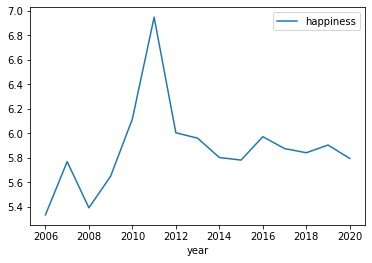

In [10]:
df = pd.read_csv('happiness_data.csv')
df_korea = df[df.country_name=='South Korea']
df_korea[['year','happiness']].set_index("year").plot()

* matplotlib의 pyplot을 활용하여 다음을 구하시오.
* 년도별 regional_indicator 별 평균 행복을 도표로 구하시오.

In [13]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

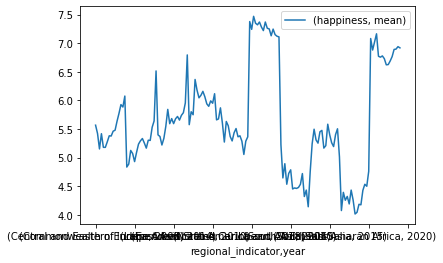

In [14]:
df_regional_indicator = df[["regional_indicator","year","happiness"]].groupby(["regional_indicator", "year"]).agg(["mean"])

plt.figure(); 
df_regional_indicator.plot(); 
plt.legend(loc='best')

### Gotchas(Using if/truth statements with pandas)

* 아래 코드의 Pandas Series는 False도 포함하고 있으며 False도, 또한 길이가 1 이상 이기에 True가 될 수 있는 상황이여서 에러가 발생합니다.

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

* Pandas Series 중 하나라도 True인 경우를 만족하고 싶은 경우 `.any()`를 사용하면 됩니다.

In [ ]:
if pd.Series([False, True, False]).any():
    print("At least one True included")
else:
    print("No True included")

There is at least one True included


* Pandas Series가 모두 True인 경우를 만족하고 싶은 경우 `.all()`을 사용하면 됩니다.

In [ ]:
if pd.Series([True, True]).all():
    print("Everything is True")
else:
    print("At least one False included")

Everything is True


* Pandas Series가 비어있는지 확인하고 싶은 경우 `.empty`나 is None을 사용하면 됩니다.

In [ ]:
if pd.Series(["1"]) is None:  
    print("No element is included")
else:
    print("At least one element included")

# 위와 같음
# if pd.Series(["1"]).empty:
#     print("No element is included")
# else:
#     print("At least one element included")
    

At least one element included
